# Составленеи модели математического вида

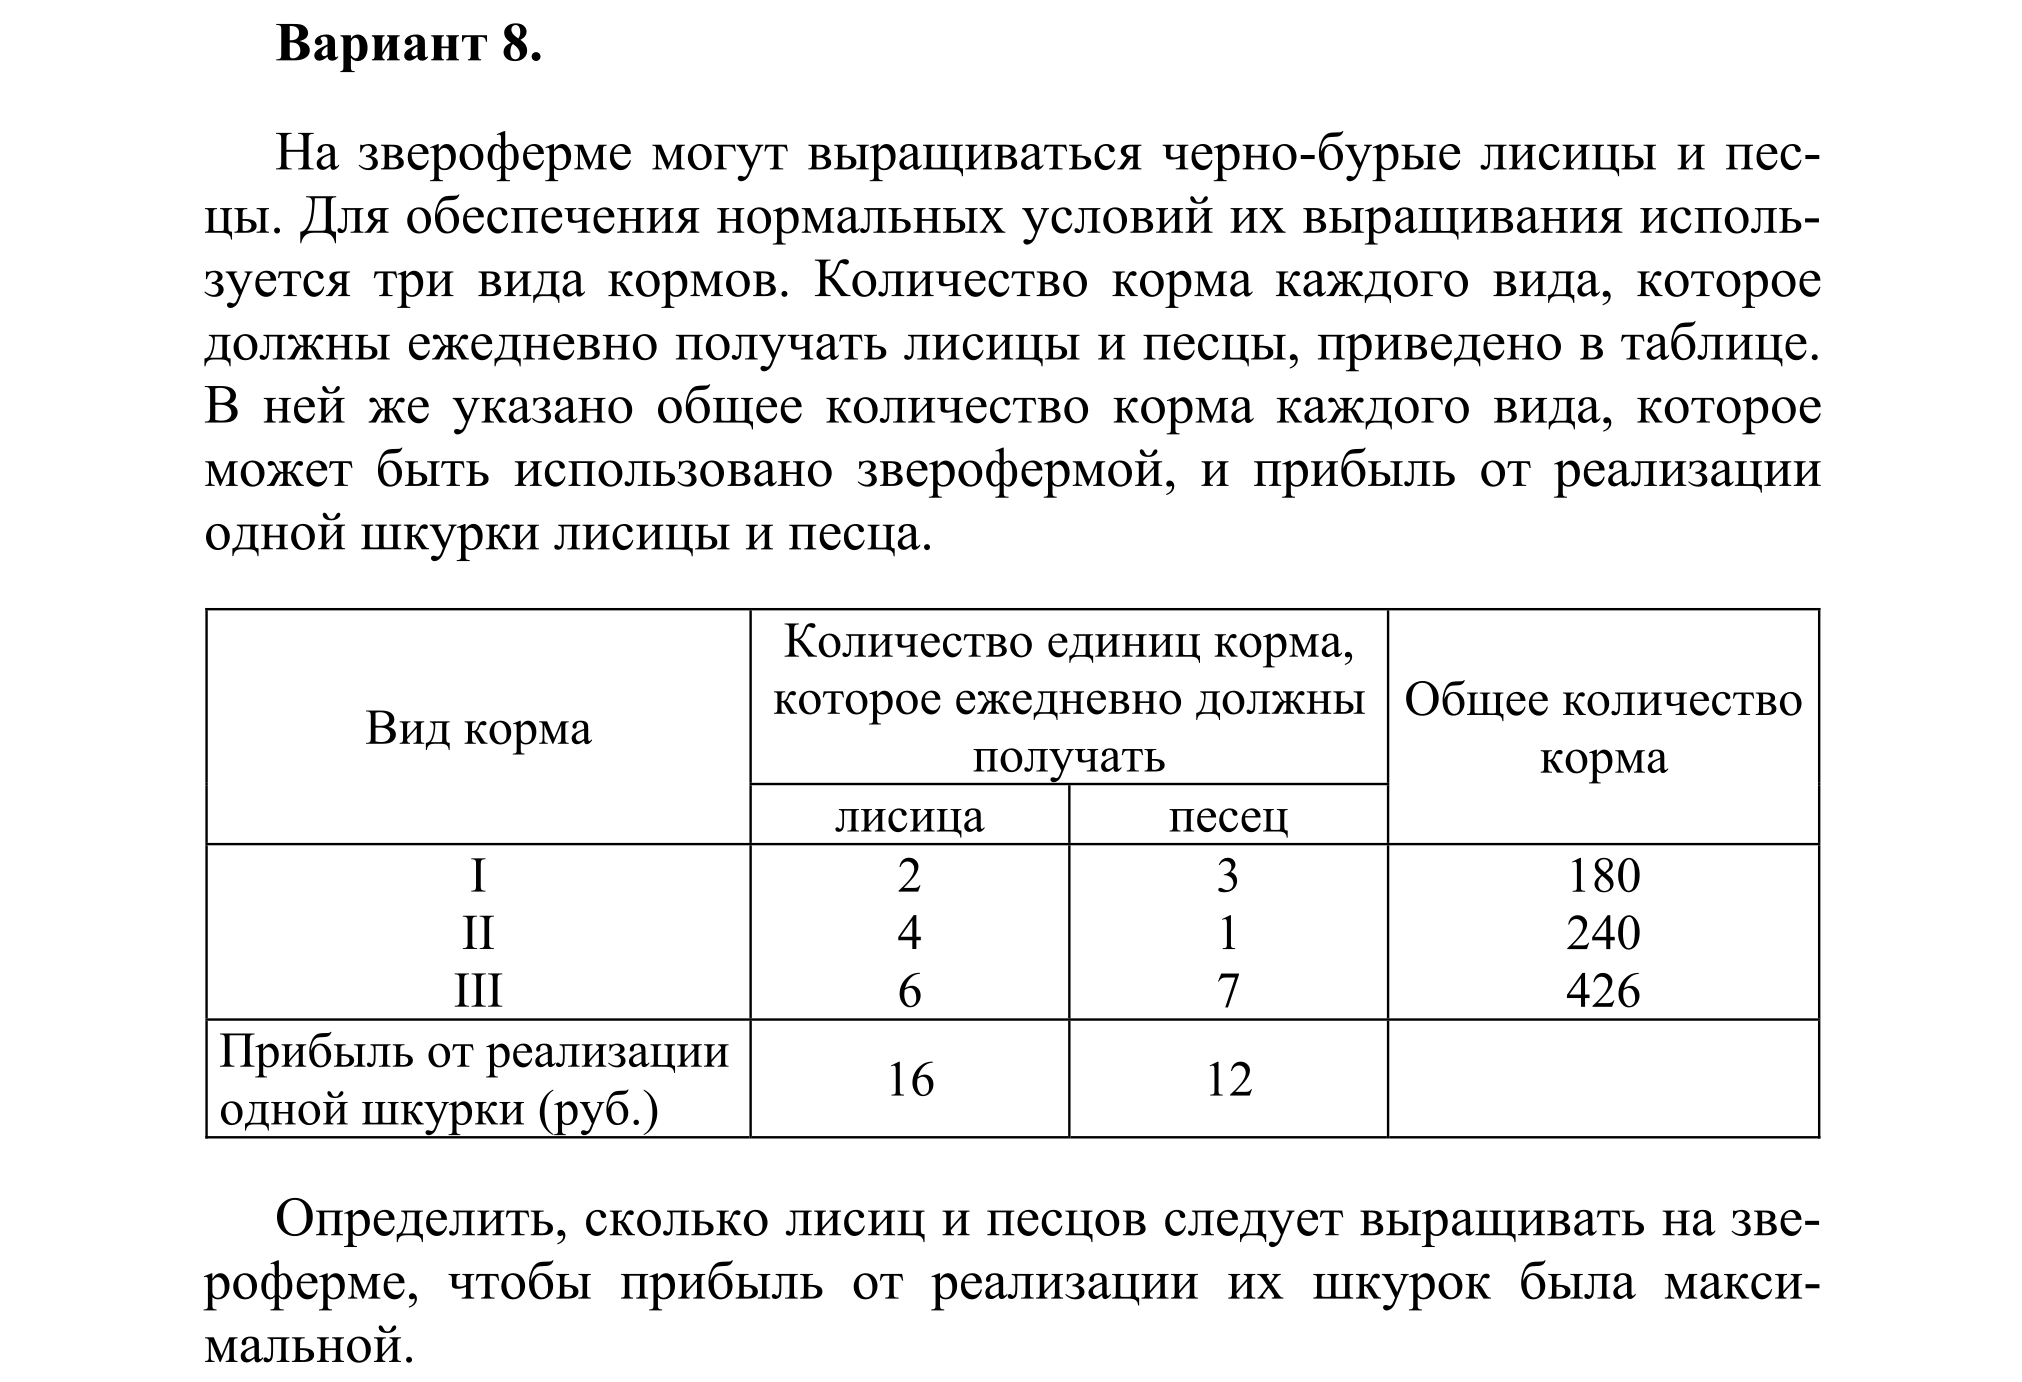

## Создаем задачу максимизациия
Здесь мы создаем объект задачи prob с именем "Maximize_Profit", указывая, что задача должна быть максимизационной. Параметр pulp.LpMaximize сообщает библиотеке, что наша цель — максимизировать целевую функцию. Есть и другие варианты задач, такие как минимизация (pulp.LpMinimize), но в данном случае мы стремимся получить максимальную прибыль.

## x1, x2
Параметр lowBound=0 указывает, что переменные не могут быть отрицательными (логично, потому что количество животных не может быть меньше нуля).

Категория переменной cat='Continuous' означает, что переменные могут принимать любое неотрицательное вещественное значение. Если бы задача была с целыми числами, мы бы могли использовать cat='Integer'.

## Определение целевой функции и ограничения
Целевая функция задачи — это прибыль, которую мы хотим максимизировать. Для лисицы прибыль составляет 16 рублей за одну шкурку, а для песца — 12 рублей.

Здесь мы добавляем к задаче выражение 16 * x1 + 12 * x2, которое представляет собой общую прибыль от выращивания лисиц и песцов. Первым параметром передаем выражение, а вторым даем имя этой функции, которое будет полезно для интерпретации модели.

Теперь добавим ограничения, связанные с количеством доступного корма:

Каждое из этих ограничений связано с количеством корма, которое доступно для зверофермы.

- Для корма I: каждая лисица потребляет 2 единицы, а каждый песец — 3 единицы. Мы можем потратить на корм I не более 180 единиц.

- Для корма II: лисица потребляет 4 единицы, а песец — 1 единицу. В наличии — 240 единиц этого корма.

- Для корма III: лисица потребляет 6 единиц, а песец — 7 единиц. На этот вид корма доступно 426 единиц.

In [2]:
!pip3 install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 79.1 MB/s eta 0:00:00


In [3]:
import pulp

# Создаём задачу максимизации
prob = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous') # Лисы
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous') # Песцы

# Запишем целевую функцию (максимизация прибыли)
prob += 16 * x1 + 12 * x2, 'Profit'

# Запишем ограничения (ограничения по кол-во корма)
prob += 2 * x1 + 3 * x2 <= 180 # Корм I
prob += 4 * x1 + 1 * x2 <= 240 # Корм II
prob += 6 * x1 + 7 * x2 <= 426 # Корм III

prob.solve()

print("Количество лисиц для выращивания: ", pulp.value(x1))
print("Количество песцов для выращивания: ", pulp.value(x2))
print("Максимальная прибыль: ", pulp.value(prob.objective))

Количество лисиц для выращивания:  57.0
Количество песцов для выращивания:  12.0
Максимальная прибыль:  1056.0
